# Stock Price  Prediction using PyTorch LSTM

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.graph_objs as go
# import plotly_express as px
# import mplfinance as mpf
plt.style.use('fivethirtyeight')

import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn

import  statsmodels.api as sm

from tqdm.notebook import tqdm
import yfinance as yf
# import talib as ta
# from talib import MA_Type


import warnings
warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'yfinance'

## EDA

In [2]:
data = yf.download("NVDA", start="2015-1-1", end="2021-2-17")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.297794,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.374790,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.047548,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.470057,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.421932,8045200
...,...,...,...,...,...,...
2021-02-09,573.630005,583.330017,568.900024,570.530029,570.530029,7189000
2021-02-10,578.530029,596.200012,573.659973,590.570007,590.570007,12133800
2021-02-11,599.210022,610.890015,597.000000,610.030029,610.030029,11245500


## Data Preprocessing

In [3]:
X_df = data.filter(['Adj Close'])
X_df[:30]

,Adj Close
Date,
2014-12-31,19.297794
2015-01-02,19.374790
2015-01-05,19.047548
2015-01-06,18.470057
2015-01-07,18.421932
2015-01-08,19.114916
2015-01-09,19.191919
2015-01-12,18.951296
2015-01-13,18.922422


In [4]:
train_length = math.ceil(len(X_df)*0.8)
train_length

1234

In [5]:
#Normalisation 
scaler = MinMaxScaler()

scaler = scaler.fit(X_df)
data_scaled = scaler.transform(X_df)
len(data_scaled)

1542

In [6]:
data_scaled

array([[0.00147256],
       [0.00160201],
       [0.00105183],
       ...,
       [0.99465357],
       [0.97518442],
       [1.        ]])

In [7]:
#Define the sliding window function
def sliding_train(data, seq_len):
    xs = []
    ys = []
    for i in range(seq_len, train_length):
        
        x = data[i-seq_len:i]
        y = data[i]
        xs.append(x)
        ys.append(y)
        
    return np.array(xs), np.array(ys)

In [8]:
#Define the sliding window function
def sliding_test(data, seq_len):
    xs = []
    ys = []
    for i in range(train_length, len(data)):
        
        x = data[i-seq_len:i]
        y = data[i]
        xs.append(x)
        ys.append(y)
        
    return np.array(xs), np.array(ys)

In [9]:
seq_len = 5

X_train, y_train = sliding_train(data_scaled, seq_len)
X_test, y_test = sliding_test(data_scaled, seq_len)

X_train = torch.from_numpy(X_train).float().view([1, -1, seq_len])
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float().view([1, -1, seq_len])
y_test = torch.from_numpy(y_test).float()

In [10]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

torch.Size([1, 1229, 5]) torch.Size([1229, 1]) torch.Size([1, 308, 5]) torch.Size([308, 1])


In [11]:
X_train

tensor([[[1.4726e-03, 1.6020e-03, 1.0518e-03, 8.0910e-05, 0.0000e+00],
         [1.6020e-03, 1.0518e-03, 8.0910e-05, 0.0000e+00, 1.1651e-03],
         [1.0518e-03, 8.0910e-05, 0.0000e+00, 1.1651e-03, 1.2946e-03],
         ...,
         [3.1885e-01, 3.2090e-01, 3.1151e-01, 3.2508e-01, 3.1788e-01],
         [3.2090e-01, 3.1151e-01, 3.2508e-01, 3.1788e-01, 3.2323e-01],
         [3.1151e-01, 3.2508e-01, 3.1788e-01, 3.2323e-01, 3.2156e-01]]])

In [12]:
# X_test

In [13]:
y_train[:5]

tensor([[0.0012],
        [0.0013],
        [0.0009],
        [0.0008],
        [0.0010]])

In [14]:
y_test[:5]

tensor([[0.3401],
        [0.3330],
        [0.3353],
        [0.3328],
        [0.3203]])

### Buiding a LSTM model

In [15]:
class MYLSTM(nn.Module):
    def __init__(self, output_size, input_size, hidden_size, num_layers, batch_size):
        super(MYLSTM, self).__init__()   #Initiate the new instance usring the __init__method of the super class
        
        self.num_classes = output_size    #number of output classer, typically a for regression
        self.input_size = input_size     #number of expected features in the input x
        self.hidden_size = hidden_size    #number of features in the hidden state h
        self.num_layers = num_layers      #number of recurrent layers
        self.batch_size = batch_size     #number of samples
        
        #Deploy the nn.LSTM as the RNN
        
        #Set batch_first=True to dictate the dimensions of the input tensor
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.mlp_1 = nn.Linear(hidden_size,128)
        self.mlp_2 = nn.Linear(128, output_size)
        
        #Use ReLU as the activation function
        self.relu = nn.ReLU()
        
    #Define the forward propagation that takes the input tensor as input
    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_size)
        c_0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_size)
        
        output, (h_n, c_n) = self.lstm(x, (h_0, c_0))
        
        out = output.view(-1, self.hidden_size)
        
        out = self.relu(out)
        
        #Connect to the fully connected layers to generate the output
        out = self.mlp_1(out)
        out = self.relu(out)
        out = self.mlp_2(out)
        
        return out

In [16]:
input_dim = seq_len   #number of features
hidden_dim = 64   #number of hidden states
num_layers = 2    #number of LSTM layers
output_dim = 1    #number of output classes
batch_size =1      #number of sample
num_epochs = 1000
learning_rate = 0.01

In [17]:
model = MYLSTM(output_dim, input_dim, hidden_dim, num_layers, batch_size)
print(model)

MYLSTM(
  (lstm): LSTM(5, 64, num_layers=2, batch_first=True)
  (mlp_1): Linear(in_features=64, out_features=128, bias=True)
  (mlp_2): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)


In [18]:
MSE = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
hist = np.zeros(num_epochs)
for t in tqdm(range(num_epochs), desc='LSTM RNN Training'):
    out = model(X_train)    #Forward propagation
    loss = MSE(out, y_train)
    
        
    if t % 100 == 99:
        print("Epoch: %d, loss:%f"%(t+1, loss.item()))
    hist[t] = loss.item()
      
    optimizer.zero_grad()                         #clear the gradients before backward propagation
    loss.backward(retain_graph=True)              #Back propagation  
    
    optimizer.step()                               #Impove from loss by updating all parameters


LSTM RNN Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 100, loss:0.000152
Epoch: 200, loss:0.000110
Epoch: 300, loss:0.000109
Epoch: 400, loss:0.000079
Epoch: 500, loss:0.000061
Epoch: 600, loss:0.000079
Epoch: 700, loss:0.000050
Epoch: 800, loss:0.000056
Epoch: 900, loss:0.000045
Epoch: 1000, loss:0.000044


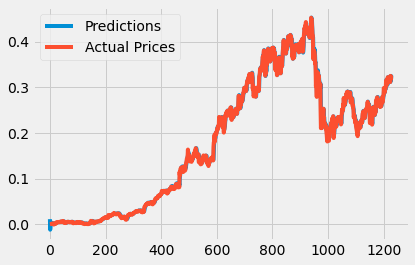

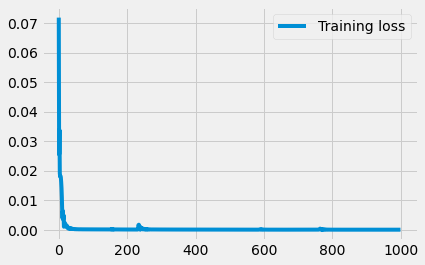

In [20]:
# Plot preds and performance
#####################

plt.plot(out.detach().numpy(), label="Predictions")
plt.plot(y_train.detach().numpy(), label="Actual Prices")
plt.legend()
plt.show()

plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

## LSTM RNN Testing

In [21]:
#Creating dataframe storing Actual and Predicted values for visualization
y = pd.DataFrame(index=X_df.index[seq_len:], columns=['Actual', 'Predicted'])
y['Actual'] = X_df[seq_len:]
y

,Actual,Predicted
Date,,
2015-01-08,19.114916,NaN
2015-01-09,19.191919,NaN
2015-01-12,18.951296,NaN
2015-01-13,18.922422,NaN
2015-01-14,18.999420,NaN
...,...,...
2021-02-09,570.530029,NaN
2021-02-10,590.570007,NaN
2021-02-11,610.030029,NaN


### Perform prediction using trained LSTM RNN

In [22]:
y_train_pred = model(X_train)                                            #Forward pass on Training Dataset/Tensor
y_train_pred_tsf = scaler.inverse_transform(y_train_pred.detach().numpy())  #Numpy conversion followed by reverse normalization

y.loc[y.index[:train_length-seq_len],'Predicted'] = y_train_pred_tsf

In [23]:
y_train_pred_tsf[:5]

array([[25.19756  ],
       [11.4719715],
       [15.179428 ],
       [19.56775  ],
       [21.01314  ]], dtype=float32)

In [24]:
y_test_pred = model(X_test)                                            #Forward pass on Training Dataset/Tensor
y_test_pred_tsf = scaler.inverse_transform(y_test_pred.detach().numpy())  #Numpy conversion followed by reverse normalization

y.loc[y.index[train_length-seq_len:],'Predicted'] = y_test_pred_tsf
y_test_pred_tsf[:5]

array([[247.38493],
       [292.89056],
       [245.55038],
       [198.47298],
       [196.84615]], dtype=float32)

In [25]:
y

,Actual,Predicted
Date,,
2015-01-08,19.114916,25.197559
2015-01-09,19.191919,11.471972
2015-01-12,18.951296,15.179428
2015-01-13,18.922422,19.567751
2015-01-14,18.999420,21.01314
...,...,...
2021-02-09,570.530029,569.286011
2021-02-10,590.570007,547.76062
2021-02-11,610.030029,582.488586


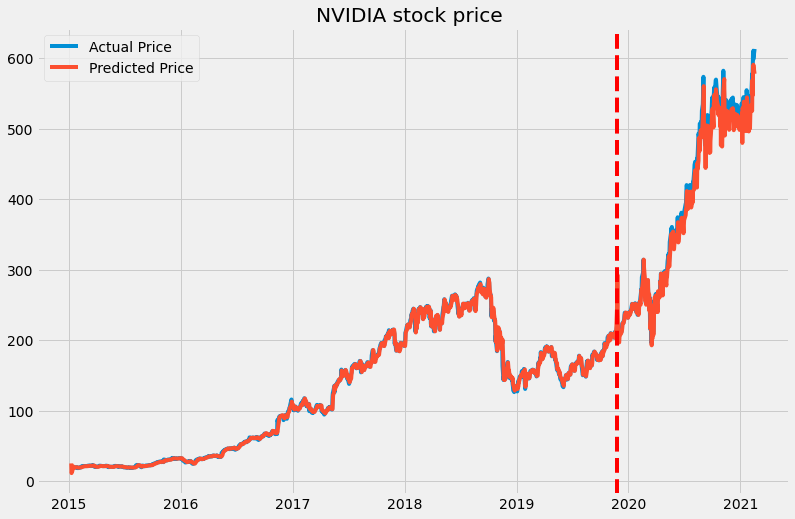

In [26]:
#Handle datetime conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(12,8))

plt.plot(y.index.values, y['Actual'], label='Actual Price')    #Actual Price  plot
plt.plot(y.index.values, y['Predicted'], label='Predicted Price')     #Predicted price plot
plt.title('NVIDIA stock price ')
plt.legend()
plt.axvline(x=y.index.values[1229], c='r', linestyle='--')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
print("MSE(Training):{}".format(mean_squared_error(
    y.loc[y.index[:train_length], 'Actual'], y.loc[y.index[:train_length],'Predicted'], squared=False)/
    y.loc[y.index[:train_length], 'Actual'].mean()))

print("MSE(Testing):{}".format(mean_squared_error(
    y.loc[y.index[train_length:], 'Actual'], y.loc[y.index[train_length:],'Predicted'], squared=False)/
    y.loc[y.index[train_length:], 'Actual'].mean()))

MSE(Training):0.03762690508936259
MSE(Testing):0.04476409650664158


In [28]:
MSE_Testing = mean_squared_error(y.loc[y.index[train_length:], 'Actual'], y.loc[y.index[train_length:],'Predicted'], squared=False)
MSE_Testing     

17.860619601533205

### Evaluating and Tuning

In [29]:
# from ray import tune


# def objective(step, alpha, beta):
#     return (0.1 + alpha * step / 100)**(-1) + beta * 0.1


# def training_function(config):
#     # Hyperparameters
#     alpha, beta = config["alpha"], config["beta"]
#     for step in range(10):
#         # Iterative training function - can be any arbitrary training procedure.
#         intermediate_score = objective(step, alpha, beta)
#         # Feed the score back back to Tune.
#         tune.report(mean_loss=intermediate_score)


# analysis = tune.run(
#     training_function,
#     config={
#         "alpha": tune.grid_search([0.001, 0.01, 0.1]),
#         "beta": tune.choice([1, 2, 3])
#     })

# print("Best config: ", analysis.get_best_config(
#     metric="mean_loss", mode="min"))

# # Get a dataframe for analyzing trial results.
# df = analysis.results_df

In [30]:
# import ray
# import time

# ray.init(num_cpus=4, num_gpus=1)

# @ray.remote(num_gpus=0.25)
# def f():
#     time.sleep(1)

# # The four tasks created here can execute concurrently.
# ray.get([f.remote() for _ in range(4)])